# **Clasificación de Pokemon Legendarios**

![](https://wallpapers.com/images/featured/cada-pokemon-legendario-yq2y7v56tbogy58q.jpg)

In [1]:
import numpy as np
import pandas as pd 

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/pokemon/Pokemon.csv


Datos originales [Aqui](https://www.kaggle.com/abcsds/pokemon )

# Importar datos y librerías

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier

In [3]:
pokemon = pd.read_csv("/kaggle/input/pokemon/Pokemon.csv", index_col = "#")

# Vista general de los datos

In [4]:
pokemon.head()

,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
#,,,,,,,,,,,,
1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [5]:
pokemon.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 800 entries, 1 to 721
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Name        800 non-null    object
 1   Type 1      800 non-null    object
 2   Type 2      414 non-null    object
 3   Total       800 non-null    int64 
 4   HP          800 non-null    int64 
 5   Attack      800 non-null    int64 
 6   Defense     800 non-null    int64 
 7   Sp. Atk     800 non-null    int64 
 8   Sp. Def     800 non-null    int64 
 9   Speed       800 non-null    int64 
 10  Generation  800 non-null    int64 
 11  Legendary   800 non-null    bool  
dtypes: bool(1), int64(8), object(3)
memory usage: 75.8+ KB


In [6]:
pokemon.describe()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.00000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,435.10250,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,119.96304,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,180.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,330.00000,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,450.00000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,515.00000,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,780.00000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [7]:
pokemon["Sum"] = pokemon[['HP', 'Attack', 'Defense',
       'Sp. Atk', 'Sp. Def', 'Speed']].sum(axis = 1)

pokemon[pokemon["Sum"]!=pokemon["Total"]].any()

Name          False
Type 1        False
Type 2        False
Total         False
HP            False
Attack        False
Defense       False
Sp. Atk       False
Sp. Def       False
Speed         False
Generation    False
Legendary     False
Sum           False
dtype: bool

In [8]:
pokemon.drop("Sum", axis = 1, inplace = True)

# Legendary
La variable de resultado o variable "y" en este modelo es la columna Legendary. Los siguientes gráficos muestran cómo el estado Legendary difiere del no Legendary en variables clave.

In [9]:
sns.set(style="ticks")

Text(0.5, 1.0, 'Attack vs Defense and Legendary data')

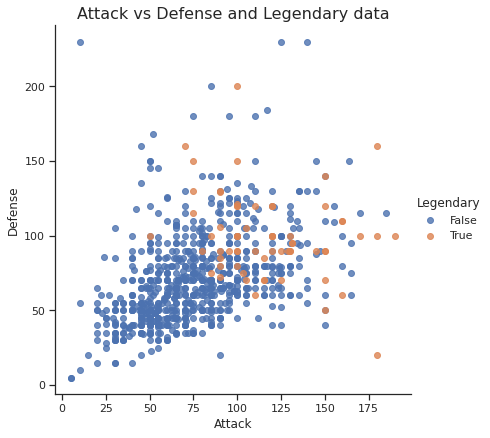

In [10]:
sns.lmplot(x = "Attack", y = "Defense", data = pokemon, hue = "Legendary", height = 6, fit_reg = False)
plt.title("Attack vs Defense and Legendary data", fontsize = 16)

Text(0.5, 1.0, 'Sp. Atk vs Sp. Def and Legendary data')

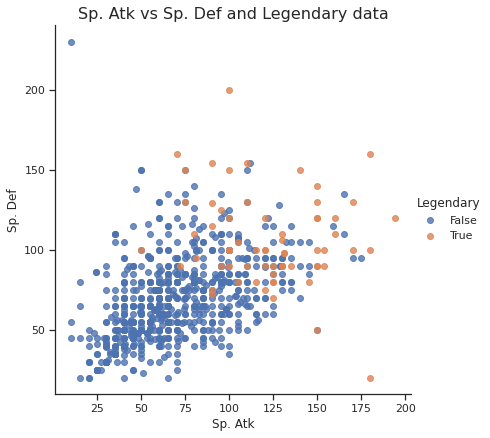

In [11]:
sns.lmplot(x = "Sp. Atk", y = "Sp. Def", data = pokemon, hue = "Legendary", height = 6, fit_reg = False)
plt.title("Sp. Atk vs Sp. Def and Legendary data", fontsize = 16)

Text(0.5, 1.0, 'Distribution of Speed separated by Legendary')

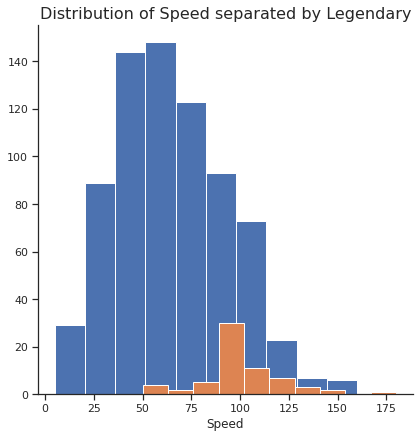

In [12]:
g = sns.FacetGrid(pokemon, hue="Legendary", height = 6)
g = g.map(plt.hist, "Speed", bins = 10)
plt.title("Distribution of Speed separated by Legendary", fontsize = 16)

Text(0.5, 1.0, 'Frequency of Type 1 data seperated by Legendary')

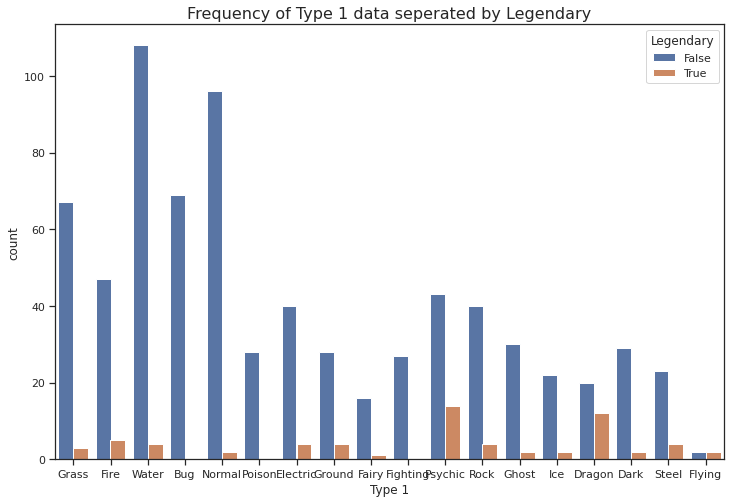

In [13]:
plt.figure(figsize=(12,8))
sns.countplot(x = "Type 1", data = pokemon, hue = "Legendary")
plt.title("Frequency of Type 1 data seperated by Legendary", fontsize = 16)

# Datos sesgados 
Antes de continuar con los modelos, hay que reconocer que los datos tienen muchos más Pokémon no legendarios y, por tanto, están sesgados a favor de los no legendarios. Como muestra la siguiente información, sólo el 8,1% de los datos son Pokémon con estado Legendario. Esto significa que un modelo podría simplemente predecir que todos los Pokémon no son legendarios y seguiría siendo bastante preciso.

Una opción para igualar la distribución podría ser alterar el tamaño de la muestra usando solo una generación específica o tipo 1, ya que el porcentaje de Pokémon legendarios difiere según estos parámetros.

In [14]:
sum(pokemon["Legendary"]== True)

65

In [15]:
(sum(pokemon["Legendary"]== True)/pokemon.shape[0])*100

8.125

In [16]:
pd.pivot_table(pokemon,index=["Generation"])

,Attack,Defense,HP,Legendary,Sp. Atk,Sp. Def,Speed,Total
Generation,,,,,,,,
1,76.638554,70.861446,65.819277,0.036145,71.819277,69.090361,72.584337,426.813253
2,72.028302,73.386792,71.207547,0.047170,65.943396,73.905660,61.811321,418.283019
3,81.625000,74.100000,66.543750,0.112500,75.806250,71.225000,66.925000,436.225000
4,82.867769,78.132231,73.082645,0.107438,76.404959,77.190083,71.338843,459.016529
5,82.066667,72.327273,71.787879,0.090909,71.987879,68.739394,68.078788,434.987879
6,75.804878,76.682927,68.268293,0.097561,74.292683,74.890244,66.439024,436.378049


In [17]:
pivot = pd.pivot_table(pokemon,index=["Type 1"],)
pivot["Legendary"].sort_values(ascending = False).head()

Type 1
Flying     0.500000
Dragon     0.375000
Psychic    0.245614
Steel      0.148148
Ground     0.125000
Name: Legendary, dtype: float64

# Modelando los datos
Existen diferentes modelos que podrían usarse para predecir pokemon legensarios. Para este proyecto se eligió RandomForest, con variables intercambiadas para comparar su efecto en la precisión del modelo.

## Overall model
El overall model sería uno que examina todas/la mayoría de las variables de un Pokémon y las usa para predecir si es legendario. Sin alterar los datos de la muestra para equilibrarlos, este puede ser el mejor modelo ya que tiene la mayor cantidad de información. 

In [18]:
pokemon["Type 1"].nunique()

18

In [19]:
pokemon["Type 2"].nunique()

18

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le = LabelEncoder()
pokemon['Type 1 Code'] = le.fit_transform(pokemon['Type 1'])
pokemon['Type 2'].fillna("NA",inplace =True )
pokemon['Type 2 Code'] = le.fit_transform(pokemon['Type 2'])
pokemon = pokemon.drop(["Type 1", "Type 2"], axis =1)

In [22]:
pokemon.drop('Name',axis=1,inplace=True)

In [23]:
pokemon.head()

,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary,Type 1 Code,Type 2 Code
#,,,,,,,,,,,
1,318,45,49,49,65,65,45,1,False,9,14
2,405,60,62,63,80,80,60,1,False,9,14
3,525,80,82,83,100,100,80,1,False,9,14
3,625,80,100,123,122,120,80,1,False,9,14
4,309,39,52,43,60,50,65,1,False,6,12


### Creando el modelo

In [24]:
X = pokemon.drop('Legendary',axis=1)
y = pokemon['Legendary']

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 101)

In [26]:
FullRFC = RandomForestClassifier()
FullRFC.fit(X_train, y_train)

RandomForestClassifier()

In [27]:
FullRFC_pred = FullRFC.predict(X_test)

In [28]:
print(confusion_matrix(y_test,FullRFC_pred))
print(classification_report(y_test,FullRFC_pred))

[[214   5]
 [  9  12]]
              precision    recall  f1-score   support

       False       0.96      0.98      0.97       219
        True       0.71      0.57      0.63        21

    accuracy                           0.94       240
   macro avg       0.83      0.77      0.80       240
weighted avg       0.94      0.94      0.94       240



La precisión al predecir los Pokémon no legendarios es relativamente alta, con una puntuación f1 del 98% que se esperaba. Sin embargo, la atención debería centrarse en las puntuaciones de los Pokémon legendarios (es decir, los valores verdaderos). En este modelo, las puntuaciones f1 para los valores verdaderos son del 72%. 

La siguiente etapa del proyecto sería intentar crear un modelo que tenga precisiones similares y utilice menos variables.

## Modelo 1 - Stats only
El primer modelo se enfoca en datos numericos: 
* HP
* Attack
* Defence
* Sp. Atk
* Sp. Def
* Speed 

In [29]:
Stats = pokemon[[ "Total"]]

In [30]:
X = Stats
y = pokemon['Legendary']

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 101)

In [32]:
StatsRFC = RandomForestClassifier()
StatsRFC.fit(X_train, y_train)

RandomForestClassifier()

In [33]:
StatsRFC_pred = StatsRFC.predict(X_test)

In [34]:
print(confusion_matrix(y_test,StatsRFC_pred))
print(classification_report(y_test,StatsRFC_pred))

[[215   4]
 [  8  13]]
              precision    recall  f1-score   support

       False       0.96      0.98      0.97       219
        True       0.76      0.62      0.68        21

    accuracy                           0.95       240
   macro avg       0.86      0.80      0.83       240
weighted avg       0.95      0.95      0.95       240



Como era de esperar, las puntuaciones de f1 para los valores verdaderos han disminuido y ahora son del 68 %. Puede ser interesante observar que, si bien las puntuaciones de la F1 han disminuido en 4 puntos porcentuales, la precisión del modelo general sólo ha disminuido en 1 punto porcentual. 

# Modelo 2 - Combat data
El modelo 2 selecciona aún más las variables con el objetivo de que un jugador novato solo pueda centrarse en las siguientes variables.
* Attack
* Defence
* HP

In [35]:
combat = pokemon[["Attack","Defense","HP"]]

In [36]:
X = combat
y = pokemon['Legendary']

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 101)

In [38]:
CombatRFC = RandomForestClassifier()
CombatRFC.fit(X_train, y_train)

RandomForestClassifier()

In [39]:
CombatRFC_pred = CombatRFC.predict(X_test)

In [40]:
print(confusion_matrix(y_test,CombatRFC_pred))
print(classification_report(y_test,CombatRFC_pred))

[[213   6]
 [ 16   5]]
              precision    recall  f1-score   support

       False       0.93      0.97      0.95       219
        True       0.45      0.24      0.31        21

    accuracy                           0.91       240
   macro avg       0.69      0.61      0.63       240
weighted avg       0.89      0.91      0.90       240



Como era de esperar, la precisión del modelo ha disminuido significativamente, con una puntuación f1 para valores verdaderos de solo el 32 %. 

# Modelo 3 stats + generation
Volviendo al modelo uno, como todavía excluimos algunas variables, el modelo 3 explora el impacto de agregar la variable de generación al modelo.


In [41]:
StatsG = pokemon[[ "Total","Generation"]]

In [42]:
X = StatsG
y = pokemon['Legendary']

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 101)

In [44]:
StatsGRFC = RandomForestClassifier()
StatsGRFC.fit(X_train, y_train)

RandomForestClassifier()

In [45]:
StatsGRFC_pred = StatsGRFC.predict(X_test)

In [46]:
print(confusion_matrix(y_test,StatsGRFC_pred))
print(classification_report(y_test,StatsGRFC_pred))

[[211   8]
 [  2  19]]
              precision    recall  f1-score   support

       False       0.99      0.96      0.98       219
        True       0.70      0.90      0.79        21

    accuracy                           0.96       240
   macro avg       0.85      0.93      0.88       240
weighted avg       0.97      0.96      0.96       240



Sorprendentemente, este modelo obtiene mejores resultados que el modelo general en la predicción de los valores verdaderos y la precisión general también es 1 punto porcentual mayor que la del modelo general. Parece que quizás los datos de "Tipo" puedan estar teniendo un efecto negativo en los resultados Verdaderos.

# Modelo 4 - Key stats + generation
Manteniendo el factor de la generación, el modelo 4 reduce algunos de los datos relacionados con el ataque y la defensa sp. 
* HP
* Attack
* Defence
* Speed
* Generation


In [47]:
keydataG = pokemon.drop(['Total','Sp. Atk', 'Type 2 Code', 'Sp. Def',"Type 1 Code"], axis = 1)

In [48]:
X = keydataG.drop('Legendary',axis=1)
y = keydataG['Legendary']

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 101)

In [50]:
KeydataGRFC = RandomForestClassifier()
KeydataGRFC.fit(X_train, y_train)

RandomForestClassifier()

In [51]:
KeydataGRFC_pred = KeydataGRFC.predict(X_test)

In [52]:
print(confusion_matrix(y_test,KeydataGRFC_pred))
print(classification_report(y_test,KeydataGRFC_pred))

[[217   2]
 [ 12   9]]
              precision    recall  f1-score   support

       False       0.95      0.99      0.97       219
        True       0.82      0.43      0.56        21

    accuracy                           0.94       240
   macro avg       0.88      0.71      0.77       240
weighted avg       0.94      0.94      0.93       240



Lamentablemente, la precisión ha caído al 94% y las puntuaciones de F1 ahora están en el 56%. Por lo tanto parece que el ataque y la defensa SP son valiosos en la precisión del modelo.

# Modelo 5
El modelo final vuelve a centrar la atención en los tipos y explora si podría compensar la exclusión de los datos del ataque Sp, la defensa Sp y la generación. 
* Type 1 
* Type 2 
* HP
* Attack
* Defence 
* Speed


In [53]:
keydata = pokemon.drop(['Sp. Atk', 'Sp. Def',"Generation"], axis = 1)

In [54]:
X = keydata.drop('Legendary',axis=1)
y = keydata['Legendary']

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state = 101)

In [56]:
KeydataRFC = RandomForestClassifier()
KeydataRFC.fit(X_train, y_train)

RandomForestClassifier()

In [57]:
KeydataRFC_pred = KeydataRFC.predict(X_test)

In [58]:
print(confusion_matrix(y_test,KeydataRFC_pred))
print(classification_report(y_test,KeydataRFC_pred))

[[216   3]
 [  8  13]]
              precision    recall  f1-score   support

       False       0.96      0.99      0.98       219
        True       0.81      0.62      0.70        21

    accuracy                           0.95       240
   macro avg       0.89      0.80      0.84       240
weighted avg       0.95      0.95      0.95       240



# Modelos y datos

## Overall model

In [59]:
print(confusion_matrix(y_test,FullRFC_pred))
print(classification_report(y_test,FullRFC_pred))

[[214   5]
 [  9  12]]
              precision    recall  f1-score   support

       False       0.96      0.98      0.97       219
        True       0.71      0.57      0.63        21

    accuracy                           0.94       240
   macro avg       0.83      0.77      0.80       240
weighted avg       0.94      0.94      0.94       240



## Modelo 1

In [60]:
print(confusion_matrix(y_test,StatsRFC_pred))
print(classification_report(y_test,StatsRFC_pred))

[[215   4]
 [  8  13]]
              precision    recall  f1-score   support

       False       0.96      0.98      0.97       219
        True       0.76      0.62      0.68        21

    accuracy                           0.95       240
   macro avg       0.86      0.80      0.83       240
weighted avg       0.95      0.95      0.95       240



## Modelo 2

In [61]:
print(confusion_matrix(y_test,CombatRFC_pred))
print(classification_report(y_test,CombatRFC_pred))

[[213   6]
 [ 16   5]]
              precision    recall  f1-score   support

       False       0.93      0.97      0.95       219
        True       0.45      0.24      0.31        21

    accuracy                           0.91       240
   macro avg       0.69      0.61      0.63       240
weighted avg       0.89      0.91      0.90       240



# Modelo 3

In [62]:
print(confusion_matrix(y_test,StatsGRFC_pred))
print(classification_report(y_test,StatsGRFC_pred))

[[211   8]
 [  2  19]]
              precision    recall  f1-score   support

       False       0.99      0.96      0.98       219
        True       0.70      0.90      0.79        21

    accuracy                           0.96       240
   macro avg       0.85      0.93      0.88       240
weighted avg       0.97      0.96      0.96       240



# Modelo 4

In [63]:
print(confusion_matrix(y_test,KeydataGRFC_pred))
print(classification_report(y_test,KeydataGRFC_pred))

[[217   2]
 [ 12   9]]
              precision    recall  f1-score   support

       False       0.95      0.99      0.97       219
        True       0.82      0.43      0.56        21

    accuracy                           0.94       240
   macro avg       0.88      0.71      0.77       240
weighted avg       0.94      0.94      0.93       240



# Modelo 5

In [64]:
print(confusion_matrix(y_test,KeydataRFC_pred))
print(classification_report(y_test,KeydataRFC_pred))

[[216   3]
 [  8  13]]
              precision    recall  f1-score   support

       False       0.96      0.99      0.98       219
        True       0.81      0.62      0.70        21

    accuracy                           0.95       240
   macro avg       0.89      0.80      0.84       240
weighted avg       0.95      0.95      0.95       240

